## <span style="color:Skyblue">**Exercise: Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.**</span>

1. Measure prediction score using default n_estimators (10)
2. Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df['flower']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
# Splitting the dataset to plot scatterplots

df0=df[0:50]
df0.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa


In [10]:
df1=df[50:100]
df1.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor
99,5.7,2.8,4.1,1.3,1,versicolor


In [11]:
df2=df[100:150]

### **Sepal length vs Seapl Width (Setosa vs Versicolor)**

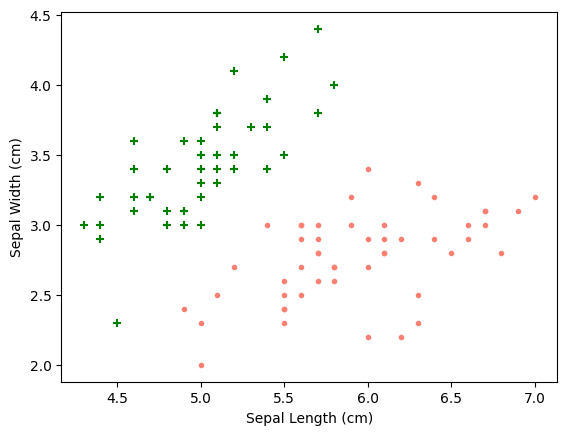

In [12]:
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='salmon', marker='.')

### **Petal length vs Pepal Width (Versicolor vs Virginica)**

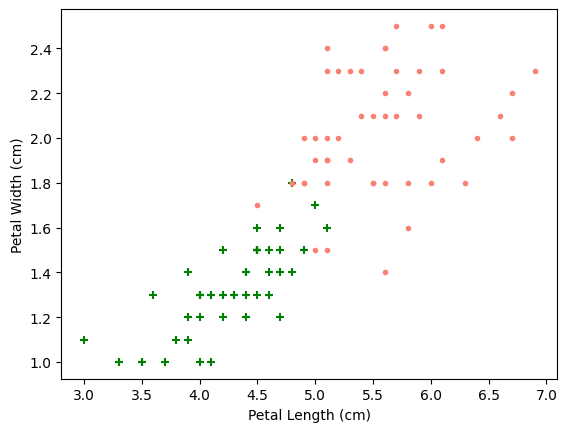

In [13]:
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', marker='+')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='salmon', marker='.')

## **Train the model using Random Forest Classifier**

In [14]:
X=df.drop(['target','flower'], axis=1)
y=df.target

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rclf=RandomForestClassifier(n_estimators=10)
rclf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [17]:
y_predicted=rclf.predict(X_test)

In [18]:
len(X_test)

30

In [19]:
rclf.score(X_test, y_test)

1.0

### Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predicted)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

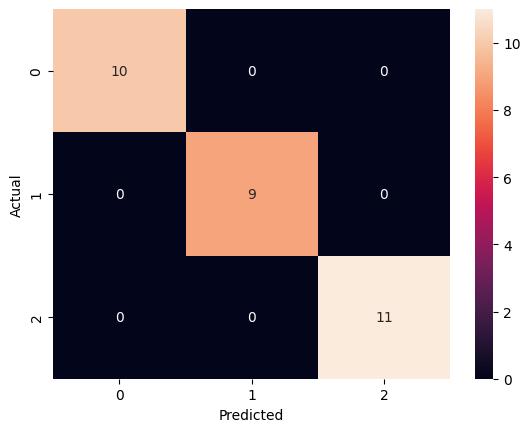

In [21]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Tuning Parameters for Random Forest

In [22]:
rclf2=RandomForestClassifier(n_estimators=40)
rclf2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [23]:
rclf2.score(X_test, y_test)

1.0